<a href="https://colab.research.google.com/github/awazbhujel/pandas_practice/blob/main/Multi_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [49]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [50]:
# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

In [51]:
#split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
#feature scaling
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [53]:
# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

**Build the MLP Model**

In [54]:
X_train.shape[1]

4

In [55]:
model = Sequential([
    Dense(10,input_shape=(X_train.shape[1],),activation="relu"),
    Dense(5,activation="relu"),
    Dense(3,activation="relu"),
    Dense(3,activation="softmax")
])

In [56]:
#summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                50        
                                                                 
 dense_24 (Dense)            (None, 5)                 55        
                                                                 
 dense_25 (Dense)            (None, 3)                 18        
                                                                 
 dense_26 (Dense)            (None, 3)                 12        
                                                                 
Total params: 135 (540.00 Byte)
Trainable params: 135 (540.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
#compile the model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [58]:
#train the model
history=model.fit(X_train,y_train,validation_split=0.2,epochs=20, batch_size=5, verbose=1)

Epoch 1/20
20/20 [==============================] - 1s 14ms/step - loss: 1.0611 - accuracy: 0.6458 - val_loss: 0.9992 - val_accuracy: 0.7083
Epoch 2/20
20/20 [==============================] - 0s 4ms/step - loss: 1.0521 - accuracy: 0.6458 - val_loss: 0.9901 - val_accuracy: 0.6667
Epoch 3/20
20/20 [==============================] - 0s 5ms/step - loss: 1.0477 - accuracy: 0.5833 - val_loss: 0.9895 - val_accuracy: 0.5833
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 1.0378 - accuracy: 0.4062 - val_loss: 0.9773 - val_accuracy: 0.5833
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 1.0301 - accuracy: 0.4271 - val_loss: 0.9655 - val_accuracy: 0.5833
Epoch 6/20
20/20 [==============================] - 0s 5ms/step - loss: 1.0226 - accuracy: 0.4271 - val_loss: 0.9547 - val_accuracy: 0.5833
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 1.0141 - accuracy: 0.4271 - val_loss: 0.9339 - val_accuracy: 0.5833
Epoch 8/20
20/20 [=

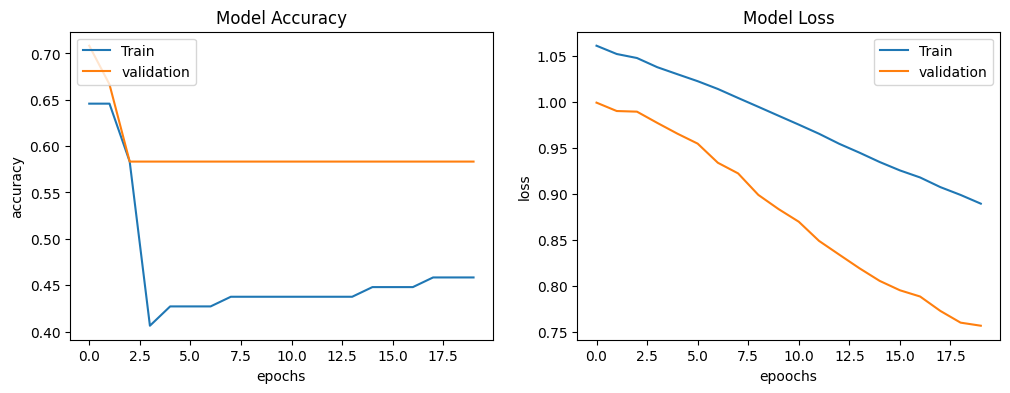

In [59]:
#plot the accuracy and the loss
plt.figure(figsize=(12,4))
# Plot training & validation accuracy values
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["Train","validation"],loc="upper left")


# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("epoochs")
plt.ylabel("loss")
plt.legend(["Train","validation"],loc="upper right")

plt.show()

In [60]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 46.67%


In [61]:
#Predict and compute accuracy score
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

1/1 [==============================] - 0s 102ms/step
Accuracy Score: 46.67%
